# Exercises: Data with Pandas
**Monday, September 21, 2020**

By now, you are comfortable working with numbers in Python. You can add, divide, subtract, multiply numerical variables and that's all fine and well. But what if, instead of single values, you had a big table of numbers you needed to perform some operation on? For that, we need a framework for working with tabular data, and for this the Python state-of-the-art is calles *Pandas*.

## Introduction to tabular data: `DataFrame`s
*Pandas* is in fact very simple. It let's you represent a table of data as something called a `DataFrame`. Then, when you have your data stored in a `DataFrame`, you can do all sorts of neat things with it, with very little code. 

Here is an example of a Pandas `DataFrame`:

In [23]:
# Import `pandas` and give it the shorter, more convenient, alias `pd`
import pandas as pd

# Create a `DataFrame` with 3 rows and 3 columns, containing the numbers from 1 to 9
df = pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Display `DataFrame`. Note that, in Jupyter notebooks, we don't use `print` when
# displaying dataframes. Try it and you will understand why!
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


**Answer:** One advantage of jupyter notebooks is that it tries to find the representation of the data. I just printed the data frame is just shown in a simple matrix while the jupyter notebooks displays it in a tabular format. 

The **bold** numbers are the *indices* and *columns*. Everything else is data. An index refers to a **horizontal row** and a column referes to a **vertical column**. In Pandas we can assign names to indices and columns. That's pretty useful, because often rows and columns actually represent real things that can be named. For example:

In [24]:
# Assign index names
df.index = ['Gertrude', 'Ludwig', 'Bertrand']

# Assign column names
df.columns = ['Age', 'Height', 'Weight']

# Display dataframe
df

,Age,Height,Weight
Gertrude,1,2,3
Ludwig,4,5,6
Bertrand,7,8,9


Almost always, the dogma is that rows contain "observations", and columns represent "attributes". For your reference, here are some of the words that are used interchangably for rows and columns:

**Row are sometimes called**:
* Observations
* Measurements
* Datapoints
* Samples
* Examples

**Columns are sometimes called**:
* Features
* Attributes
* Dimensions
* Variable

I like to think of rows as individual datapoints, and columns as the attributes that describe them. Together, the datapoints make up your **dataset**. For example, we observe one 'Gertrude' datapoint that is described by age=1, height=2 and weight=3. We can describe all other datapoints by these attributes, and that is our dataset.<br><br>

#### Testing myself

In [25]:
# Creating a dataframe

week_df = (
        pd.DataFrame([[True, True, True, False],
                      ["History & Community","Pandas Preview & Data Ethics","Variables & Operations","Basic statistical measures and plots"],
                      ["Samantha","Friedolin","Ulf","Asger"]])
        .transpose()# Transpose flips rows and colums
)

week_df

# Data her is a list of lists put into a data frame

,0,1,2
0,True,History & Community,Samantha
1,True,Pandas Preview & Data Ethics,Friedolin
2,True,Variables & Operations,Ulf
3,False,Basic statistical measures and plots,Asger


In [26]:
# Adding Index and Colum Names

week_df.index = ["Monday","Tuesday","Wednesday","Thursday"]
week_df.colums = ["Programming Class","Topic","Teacher"]

# Attention: Index and colums are both NOT a method but a property of the dataframe. That meas week_df.index() does not work!

week_df

<ipython-input-26-0bc444b1b5d8>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  week_df.colums = ["Programming Class","Topic","Teacher"]


,0,1,2
Monday,True,History & Community,Samantha
Tuesday,True,Pandas Preview & Data Ethics,Friedolin
Wednesday,True,Variables & Operations,Ulf
Thursday,False,Basic statistical measures and plots,Asger


In [27]:
# All in one 

week_df_alt = (
            pd.DataFrame(
            data = [
                    [True, True, True, False],
                    ["History & Community","Pandas Preview & Data Ethics","Variables & Operations","Basic statistical measures and plots"],
                    ["Samantha","Friedolin","Ulf","Asger"]
                    ],
                
            index = ["Programming Class","Topic","Teacher"],
            columns = ["Monday","Tuesday","Wednesday","Thursday"]
            
            ).transpose()
)

week_df_alt

,Programming Class,Topic,Teacher
Monday,True,History & Community,Samantha
Tuesday,True,Pandas Preview & Data Ethics,Friedolin
Wednesday,True,Variables & Operations,Ulf
Thursday,False,Basic statistical measures and plots,Asger


## Selecting

### Rows columns and values

On a more practical note, how do we retrieve a specific row, column or value from your dataframe? **Answer:** We use the `loc` property on the `DataFrame` type object, `df`, that we created. Read about how to use this in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). Alternatively, use this as an opportunity to practice Googling.

The approach to using the `loc` property (which admittedly behaves a bit like a method) is like this: `df.loc[index_name, column_name]`

**`df.loc[index_name, column_name]`**

> **Problem 1:** Select the "Getrude" row from `df` using the `loc` property.

In [28]:
# Show the dataframe

df

,Age,Height,Weight
Gertrude,1,2,3
Ludwig,4,5,6
Bertrand,7,8,9


In [29]:
# Answer 1: Searching for Gertrude with loc method and Index Name 

df.loc["Gertrude",:]

Age       1
Height    2
Weight    3
Name: Gertrude, dtype: int64

`loc` can also be used to select a single desired value.

> **Problem 2:** Select the "Weight" attribute of "Ludwig".

In [30]:
# Answer 2: Searching for "Weight" attribute of "Ludwig" 

df.loc["Ludwig","Height"]

5

And of course you can also select all the values of a column. You can do it like this:

In [31]:
# Selecting with the loc method

df.loc[:, 'Height']


Gertrude    2
Ludwig      5
Bertrand    8
Name: Height, dtype: int64

In [32]:
# Selecting with the Column name

df.Height

Gertrude    2
Ludwig      5
Bertrand    8
Name: Height, dtype: int64

> **Problem 3:** Explain `df.loc[:, 'Height']`. What does `:` mean?
>
> *Note: alternatively you can select the column like this: `df['Height']`, or even `df.Height`.*

> **Answer 3:** The ":" here means all. In this case selecting all rows. 

> **Problem 4:** Select simultaneously, the two columns 'Height' and 'Weight'.

In [33]:
# First Method 

df.loc[:,"Height":"Weight"]

,Height,Weight
Gertrude,2,3
Ludwig,5,6
Bertrand,8,9


In [34]:
# Second Method

df.loc[:,["Height","Weight"]]

,Height,Weight
Gertrude,2,3
Ludwig,5,6
Bertrand,8,9


In [35]:
# Note: It is as well possible to select items without the loc method. 

df[["Height","Weight"]]

# However going forward I will try to avoid confusion I will only use this funciton 


,Height,Weight
Gertrude,2,3
Ludwig,5,6
Bertrand,8,9


In [36]:
# Also using the loc method has the advantage that we at the same time can call other methods too


height = df.loc[:,"Height"].max


### Conditional selection

To communicate this, let's load some slightly more interesting data. Note that for this data, no index names are available. Therefore, we just keep the default row numbering from 0 and up (who cares what wines are called?).

In [37]:
# Import a dataset of wines from the `sklearn` library
from sklearn.datasets import load_wine

# Load it
data = load_wine()

# Put it into a `DataFrame`, and assign column names
wine_df = (
        pd.DataFrame(
        data['data'],
        columns=data['feature_names'])
)

# Display the data
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Notice two things** about how Pandas displays the data:
1. When you try to display a big `DataFrame`, it only displays enough for you to get idea of what the data looks like. Imagine your dataframe had millions of rows and thousands of columns (not an uncommon scenario you will learn), obviously you should not display everything. 
2. It summarizes the size of the `DataFrame` at the bottom of the table. **Pretty useful!**

Remember the `:` operator? I'll give it away here assuming you figured it out above: it means "everything" or "all indices". So, for example, `wine_df.loc[:]` would select all rows. But what if we only wanted to select some of the rows, maybe the wines with high alcohol content or low magnesium?

To do that, rather than selecting "all indices" we substitute `:` with an array of `bool`s, which at each index says whether to include the row or not in the selection. If that sounds abstract, here's an example:

In [38]:
# List of booleans telling us if a datapoint has above 14% alcohol

strong_wines = wine_df['alcohol'] > 14.0

# Display

strong_wines 

# Strong wine here is a list of Booleans. 
# To select the values for these wines we have to tell the interpreter to go though this list and check if the condition applies. 


0       True
1      False
2      False
3       True
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: alcohol, Length: 178, dtype: bool

> **Problem 5:** Use the `strong_wines` list of `bool`s to select only the strong wines in `wine_df`. Explain how using a bool array to select row indices works in your intuition.

In [39]:
# Selecting stongwines

strong_wine_dataframe = wine_df.loc[strong_wines]

strong_wine_dataframe


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0


> Python goes through the dataframe and which of the values are true 

In [40]:
# Alternative: All in one statement

strong_wines_alternatives = wine_df.loc[(wine_df["alcohol"] > 4)]

strong_wines_alternatives


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [41]:
# Selecting two arguments 

storn_wines_and_highl_color = wine_df.loc[(wine_df["alcohol"]>4) & (wine_df["color_intensity"]>2)]

storn_wines_and_highl_color

# NOTE: PANDAS does not accept the logical operator and.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


> **Problem 6:** Select the "alcohol" column of wines that have "flavanoids" < 0.5.

In [42]:
# Answer 6: Selecting with two conditions


wine_df.loc[wine_df['flavanoids']< 0.5, "alcohol"]

136    12.25
138    13.49
146    13.88
165    13.73
170    12.20
Name: alcohol, dtype: float64

> **Reflection:** Think about what the `loc` property lets you do. You have used it to select specific indices by name, and selections of indices with a list of booleans. Do you think you could do the same with column selection? Explain how this works to your neighbor. What if you wanted to select wines on multiple conditions, for example an alcohol content higher than some value **and** a flavanoid content lower than some other value? Would that be possible, and if so, how?

In [43]:
# Trying out the classical loc construction

two_selectives = wine_df.loc[(wine_df['alcohol']>10) & (wine_df['flavanoids']<1.0), :]

two_selectives



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.950000,1.05,1.82,520.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.500000,0.95,2.26,625.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.920000,0.89,2.15,590.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780.0


> `(wine_df['alcohol']>10)` and `(wine_df['flavanoids']<1.0)` look at the rows with this condition even if the column is selected**
when we check if for example the alcohol content of a wine we look at the rows not the columns. I we were to put the condition as a second argument (column argument) python would check if the string alcohol is bigger than 10 which gives us an error message. 


## Merging `DataFrame`s

It's not uncommon that we need to merge tables together into a new, bigger table. Sometimes all pieces have the same shape and column names so we can **join them vertically**.

>     pd.concat([df1, df2, df3], axis=0)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png">

Of course you could also **join them horizontally**:

>     pd.concat([df1, s1], axis=1)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_series_ignore_index.png">

These are straight forward examples, but there are all sorts of things that could complicate your decision about how exactly you want to join `DataFrame`s. For example, what if you wanted to join horizontally (maybe to add more attributes to your datapoints), but only keep the rows that existed in all `DataFrame`s? This is called an **inner join**.

>     pd.concat([left, right], axis=0, join='inner')

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_join_inner.png">

The opposite of an inner join is called an **outer join**. It keeps all rows from the joined tables and fills in `NaN`s where data does not exist (`NaN` is short for "not a number").

>     pd.concat([left, right], axis=0, join='outer')

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_join_outer.png">

Check out [the official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) for merging, joining and concatenating `DataFrame`s.

> **Exercise:** Take a moment to carefully understand the above examples, and in particular reflect on the meaning of setting `axis=0` or `1`, and setting `join='inner'` or `'outer'`. Make sure you understand this well enough that you can explain it to someone.

> **Problem 7:** Take the `left` and `right` tables below and join them, not horizontally, but vertically and outer. Explain the result you get.

In [44]:
# Creating the dataframe 

left = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

right = pd.DataFrame({
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

# Looking at datframe on it´s own

left

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [45]:
# Looking at datframe on it´s own

right

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [46]:
# Answer 7

pd.concat(
            [left,right],
            axis = 0,          # joining vertically
            join = 'outer'     # outer with Na
)

# Explaining: Because we chose outer and a vertical join. For the columns missing in the other table python fills in 
# missing values

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


> **Reflection:** Try to imagine some cases where you would need to join tables. I'll inspire your thinking. Maybe you collect questionnaire data each week on some subject from a large population, and you need to continuously join the new data into the existing dataframe. Can you think of other examples? See if you can think of examples both for inner and outer joins.

>**Examples** 

>- Corona testing from different testing centers

>- Tweets form different Twitter accounts


<br>

## Summary statistics

It is useful to be able to summarize a dataset in a few key numbers. *Summary statistics*
does that for us. Pandas has a set of nice tools to make this very easy!

> **Problem 8**: Execute `wine_df.describe()`. What does it show?

In [47]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



> **Answer 8:**
The method describe puts out a list of central statics on each attribute.


> **Problem 9**: Explain what each statistic means.

> **Answer 9:**

- COUNT = the number of cases here wines
- Mean = the average
- STD = Standartdeviation shows how much the value in average deviate form the mean
- MIN = the minumum is the smallest value 
- MEDIAn = value separating the higher half from the lower half of a data sample
- 1st quartile = first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set.
- 3ed quartile = middel number between the median and the highest value of the attribute
- MAX = highest value




A nice feature of the **std** (the "Standard Deviation", denoted σ) is that roughly **68.2% of the data** lies within ±1σ from the mean (dark blue region below). Narrower, **50% of the data lies within ±0.675σ of the mean**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/2560px-Standard_deviation_diagram.svg.png" width="400px">

In [48]:
# Calculating standart deviation

alc_plus = 13+(0.81*1)
alc_mins = 13-(0.81*1)
print(alc_plus)
print(alc_mins)

13.81
12.19


> **Problem 10:** As you can read from the summary statistics table the standard deviation of alcohol percentage content is 0.81. The mean is 13. Substitute the `?`s in the statements below with correct values:
>
>        A) 50% of wines have an alcohol content between 12.19 percent and 13.81 percent.
>    
>        B) 0.1% of wines have an alcohol content of under 10.57 percent.
>       
>        C) 0.1% of wines have an alcohol content of over 15.43 percent.

In [49]:
mean_plus_standardiviation = wine_df.alcohol.mean() + wine_df.alcohol.std()
print(mean_plus_standardiviation)

13.812444515533942


In [50]:
mean_minus_standardiviation = wine_df.alcohol.mean() - wine_df.alcohol.std()
print(mean_minus_standardiviation)

12.188791439522225


These statements assume that the distribution of alcohol content (or whatever other feature we might have made statements about) are normally distributed (i.e. follow a nice bell curve). This is not necessarily true of course, but in the current case it is a fair enough assumption. You can actually **plot the distribution of the variable** like `wine_df.alcohol.hist()`. See for yourself.

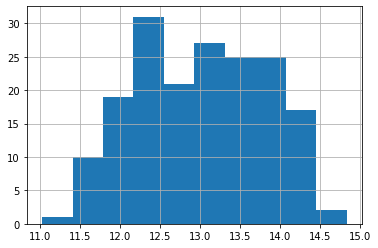

In [51]:
wine_df.alcohol.hist()

You will probably agree that alcohol content, in this case, does not look like a perfect bell curve. So lets try another approach to estimating the interval in which 50% of wines lie.

In [52]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


>**Problem 11:** From information about the different quartiles (i.e. 25%, 50%, 75%) in the summary table (so not using the Standard Deviation), identify again the `?`s in statement `A)` from the previous problem.

> **Answer 7**:  A) 50% of wines have an alcohol content between **12.362500** percent and **13.677500** percent.

> **Reflection**: Rephrase again what `wine_df.describe()` shows, and why it is useful. And what was the difference in how you completed statement `A)` from Problem 10 to Problem 11? Why are the values different? Talk to your neighbor or the instructor.

> The histogram shows the distribution of the alcohol content with the alcohol content in percent on the x-axis and the number of cases on the y-axis. The histogram shows also that the alcohol content is not normal distributed. That means that the underling assumption of problem 10 was not given what also explains why the values were different. 

## Group-by operations

Often times we have some data, and need to know e.g. the average of every datapoint
that matched a certain criteria. Or our datapoints are categorized by some variable
(e.g. *sex* categorizes people into *male*, *female* and sometimes *non-binary*), and we want
to count how many datapoints that fall in each category. Then we use *group-by*!

We are going to use the Titanic dataset in this section. Each row is a passanger, and each
column describes an attribute of the passanger. Please stare at it in for a little while and see if you can make sense of the columns.

*Hint: if you want to display more rows you can start by Googling something "pandas display more rows".*

In [53]:
titanic_df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


To "group by" you use the `group_by` method on your `DataFrame` type object, which creates a new `DataFrameGroupBy`. Below I group by "Pclass".

In [74]:
# Perform the group-by operation
df_grouped_by_pclass = titanic_df.groupby('Pclass')


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500


As you can see, the object doesn't really display anything. But it can do lots of things! Let's try to use the `get_group` method on it to display **all datapoints with a "Pclass" of 3**.

In [58]:
df_grouped_by_pclass.get_group(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
...,...,...,...,...,...,...,...,...
878,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500


> **Exercise**: Try displaying also the passangers of "Pclass" 1 and 2, and see if you can spot any differences in e.g. fare price, age, whether they survived (1) or not (0), etc.

In [60]:
# First class

df_grouped_by_pclass.get_group(1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
23,1,1,Mr. William Thompson Sloper,male,28.0,0,0,35.5000
...,...,...,...,...,...,...,...,...
867,1,1,Mrs. Richard Leonard (Sallie Monypeny) Beckwith,female,47.0,1,1,52.5542
868,0,1,Mr. Frans Olof Carlsson,male,33.0,0,0,5.0000
875,1,1,Mrs. Thomas Jr (Lily Alexenia Wilson) Potter,female,56.0,0,1,83.1583
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


In [61]:
# Second class 

df_grouped_by_pclass.get_group(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
15,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000
17,1,2,Mr. Charles Eugene Williams,male,23.0,0,0,13.0000
20,0,2,Mr. Joseph J Fynney,male,35.0,0,0,26.0000
21,1,2,Mr. Lawrence Beesley,male,34.0,0,0,13.0000
...,...,...,...,...,...,...,...,...
862,1,2,Miss. Asuncion Duran y More,female,27.0,1,0,13.8583
870,1,2,Mrs. Samuel (Hannah Wizosky) Abelson,female,28.0,1,0,24.0000
876,1,2,Mrs. William (Imanita Parrish Hall) Shelley,female,25.0,0,1,26.0000
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000


In [67]:
mean_first_class= (df_grouped_by_pclass
                  .get_group(1)
                  .mean()
                  )
mean_first_class

Survived                    0.629630
Pclass                      1.000000
Age                        38.788981
Siblings/Spouses Aboard     0.416667
Parents/Children Aboard     0.356481
Fare                       84.154687
dtype: float64

In [66]:
mean_second_class= (
                    df_grouped_by_pclass
                    .get_group(2)
                    .mean()
                    )
mean_second_class

Survived                    0.472826
Pclass                      2.000000
Age                        29.868641
Siblings/Spouses Aboard     0.402174
Parents/Children Aboard     0.380435
Fare                       20.662183
dtype: float64

In [68]:
mean_third_class= (
                    df_grouped_by_pclass
                    .get_group(3)
                    .mean()
                    )
mean_third_class

Survived                    0.244353
Pclass                      3.000000
Age                        25.188747
Siblings/Spouses Aboard     0.620123
Parents/Children Aboard     0.396304
Fare                       13.707707
dtype: float64

**Exercise Observation /Answer** It seems that at least regarding the survival rate there is a difference between the classes. Also the fare as well as the age differs. 

OK, so we can eyeball some differences between passangers grouped by "Pclass". But it's not very quantitative. Luckily, Pandas lets us get the mean of attributes for each group **very easily**.

In [72]:
df_grouped_by_pclass.mean()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


> **Exercise**: Wow, there are some big differences between passangers of different classes. Take a moment to stare at them. Cruel reality...

![](https://media.giphy.com/media/OJw4CDbtu0jde/giphy.gif)

You can group by as many attributes at the same time as you like. E.g. if I wanted to group by "Sex" and "Pclass" at the same time, I would do `titanic_df.group_by(['Pclass', 'Sex'])`.

> **Problem 12:** Play with the `group_by` method to find subgroups of passengers with very good and very bad rates of survival. Reflect on your findings. Do they tell you anything about how the value of life was evaluated in the year 1912? Does anything you found here deviate from what you thought?

In [81]:
# Group by sex

group_class_sex = titanic_df.groupby(['Pclass', 'Sex'])
group_class_sex.mean()

Survived        Age  Siblings/Spouses Aboard  \
Pclass Sex                                                    
1      female  0.968085  35.255319                 0.553191   
       male    0.368852  41.511639                 0.311475   
2      female  0.921053  28.980263                 0.486842   
       male    0.157407  30.493796                 0.342593   
3      female  0.500000  22.135417                 0.895833   
       male    0.137026  26.470612                 0.504373   

               Parents/Children Aboard        Fare  
Pclass Sex                                          
1      female                 0.457447  106.125798  
       male                   0.278689   67.226127  
2      female                 0.605263   21.970121  
       male                   0.222222   19.741782  
3      female                 0.798611   16.118810  
       male                   0.227405   12.695466

In [86]:
# Group by Age

group_age = titanic_df.groupby("Age")

group_age.mean()

,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Age,,,,,
0.42,1.0,3.0,0.0,1.0,8.5167
0.67,1.0,2.0,1.0,1.0,14.5000
0.75,1.0,3.0,2.0,1.0,19.2583
0.83,1.0,2.0,0.5,1.5,23.8750
0.92,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...
70.00,0.0,1.5,0.5,0.5,40.7500
70.50,0.0,3.0,0.0,0.0,7.7500
71.00,0.0,1.0,0.0,0.0,42.0792


In [89]:
# Group by class and gender and age

group_class_sex_sur = titanic_df.groupby(["Pclass","Sex"])["Survived"].count()

group_class_sex_sur

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      343
Name: Survived, dtype: int64

Note, that obviously, there are a many more things you can do with group-by operations. For an in depth review, check out [Real Python's extensive guide on group-by with Pandas](https://realpython.com/pandas-groupby/).

> **Reflection**: Summarize the key points in this section. Explain to your neighbor (who is probably pretty tired of listening by now) what group-by is, and what it is useful for.